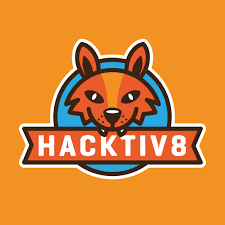

# FINAL PROJECT 4

team :
1. ANUGRAH AIDIN YOTOLEMBAH PYTN-KS09-023
2. ELSA WULANDARI PYTN-KS09-002
    

# A. Perkenalan 


## Latar Belakang
Kasus ini dibutuhkan untuk mengembangkan segmentasi pelanggan untuk menentukan strategi pemasaran.
sample Dataset merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File tersebut berada di tingkat pelanggan dengan 18 variabel perilaku.

## Dataset

Berikut penjelasan Data Dataset Kartu Kredit :-

CUSTID : Identifikasi Pemegang Kartu Kredit (Kategori)

BALANCE : Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian

BALANCEFREQUENCY : Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)

PURCHASES : Jumlah pembelian yang dilakukan dari akun

ONEOFFPURCHASES : Jumlah pembelian maksimum dilakukan dalam sekali jalan

INSTALLMENTS PURCHASES : Jumlah pembelian dilakukan secara angsuran

CASHADVANCE : Uang muka yang diberikan oleh pengguna

PURCHASES FREQUENCY : Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)

ONEOFFPURCHASESFREQUENCY : Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)

PURCHASES INSTALLMENTS FREQUENCY : Seberapa sering dilakukan pembelian secara mencicil (1 = sering dilakukan, 0 = tidak sering dilakukan)

CASHADVANCEFREQUENCY : Seberapa sering uang muka dibayarkan

CASHADVANCETRX : Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"

PURCHASESTRX : Jumlah transaksi pembelian yang dilakukan

CREDITLIMIT : Batas Kartu Kredit untuk pengguna

PAYMENTS : Jumlah Pembayaran yang dilakukan oleh pengguna

MINIMUM_PAYMENTS : Jumlah pembayaran minimum yang dilakukan oleh pengguna

PRCFULLPAYMENT : Persentase pembayaran penuh yang dibayarkan oleh pengguna

TENURE : Jangka waktu layanan kartu kredit untuk pengguna

# B. Import Library
Bagian ini berisi library apa saja yang di pakai oleh program pada final project 4 ini

In [386]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats
SEED = 42
import pickle


print('dataset is ready')

dataset is ready


# C. Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

## 1. Pertama kita akan memasukkan dataset ke dalam program ini

In [387]:
df = pd.read_csv('dataset/CC GENERAL.csv')
df

print('dataset is ready')

dataset is ready


## 2. selanjutnya menampilkan informasi 5 data teratas dan 5 data terbawah 

In [388]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [389]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


## 3. selanjutnya menampilkan informasi pada dataset

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

pada dataset ini memiliki 8950 baris dan 18 kolom, serta memiliki 3 tipe data yang di gunakan yaitu tipe data object, float64 dan int64

## 4. Selanjutnya menampilkan baris dan kolom yang berada di dalam dataset

In [391]:
df.shape

(8950, 18)

bisa di lihat bahwa pada dataset ini memiliki 8950 baris dan 18 kolom

## 5. Selanjutnya Menampilkan informasi tentang statistik deskriptif pada masing masing atribut yang bertipe numerik

In [392]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


dapat di lihat bahwa, di setiap label pada dataset ini memiliki masing masing nilai count, minimum, maksimum dll yang nantinya datanya bisa di olah 

## 6. Selanjutnya menampilkan informasi tentang statistik deskriptif pada masing masing atribut yang bertipe object

In [393]:
df.describe(include='O')

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


# D. Data Cleaning
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

## 1. pertama kita akan mengecek apakah ada nilai yang terduplikat atau tidak ada yang berada di dataset ini

In [394]:
df.duplicated().sum()

0

pada dataset ini tidak ada nilai yang yang terduplikat

## 2. selanjutnya mengecek missing value pada dataset

In [395]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

pada dataset ini memiliki dua missing value di dua label yaitu label credit_limit dan label minimum payments, dan akan kita cleaning data nya dengan cara melakukan proses pengisian missing value menggunakan nilai median agar tidak adanya missing value lagi

## 3. Menambahkan atau mengisi missing value menggunakan nilai median agar tidak adanya missing value pada dataset

In [396]:
df.CREDIT_LIMIT.fillna(value=df.CREDIT_LIMIT.median(), inplace=True)
df.MINIMUM_PAYMENTS.fillna(value=df.MINIMUM_PAYMENTS.median(), inplace=True)

## 4. Selanjutnya mengecek kembali missing value pada dataset 

In [397]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

bisa di lihat bahwa pada dataset ini semua labelsnya bernilai 0 yang artinya sudah tidak ada lagi missing values

# E. EDA : EXPLORATORY DATA ANALYSIS
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.


## 1. pertama, menampilkan informasi statistik pada tipe data numerik dan object  pada dataset agar kita mengetahui nilai minimum, maksimum dll pada dataset 

In [398]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [399]:
df.describe(include='O')

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


didapatkan informasi kali ini bahwa : 

- rata-rata saldo/Balance dari semua nasabah yaitu 1564 dollar
- rata-rata saldo terupdate dari semua nasabah yakni 0,877 yang artinya mayoritas nasabah aktif mengupdate saldonya.
- Purchases paling banyak yakni 49039.57 purchases
- Credit limit minimal yaitu 50 dollar dan maksimal yaitu 30000 dollar.
- pembayaran/payment yang paling banyak dari semua nasabah itu sebanyak 50721 dollar
- rata rata nasabah yang melakukan peminjaman  di bank ini, memiliki masa berlaku/jangka waktu itu selama 11 tahun dan yang paling tinggi/ paling lama selama 12 bulan 

## 2. selanjutnya membuat visualisasi data berdasarkan pertanyaan

**Questions :** Berapa bulan jangka waktu tenure, dimana terjadi yang paling banyak transaksi terjadi?


**Visualizations :**

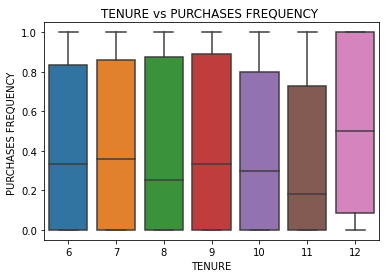

In [400]:
sns.boxplot(x='TENURE', y='PURCHASES_FREQUENCY', data=df)
plt.title('TENURE vs PURCHASES FREQUENCY ')
plt.xlabel('TENURE')
plt.ylabel('PURCHASES FREQUENCY ')
plt.show()


**Analisi :** Berdasarkan plot diatas maka bulan jangka waktu tenure,bulan 12 merupakan pemberian jangka waktu kartu kredit yang paling banyak melakukan transaksi dapat disimpulkan bahwa semakin lama jangka waktu yang diberikan maka semakin banyak transaksi yang terjadi.

**Questions :** Pada jangka waktu berapa transaksi paling banyak dilakukan dengan angsuran ?


**Visualizations :**

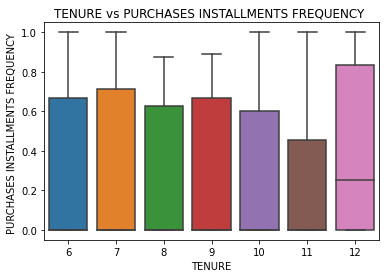

In [401]:
sns.boxplot(x='TENURE', y='PURCHASES_INSTALLMENTS_FREQUENCY', data=df)
plt.title('TENURE vs PURCHASES INSTALLMENTS FREQUENCY ')
plt.xlabel('TENURE')
plt.ylabel('PURCHASES INSTALLMENTS FREQUENCY ')
plt.show()


**Analisis :**

1.Dapat dilihat bahwa lama tenure bulan 12 merupakan bulan yang paling banyak terjadi transaksi dengan pembayaran secarang angsuran

2.Semakin lama tenure kartu kredit yang dimiliki oleh konsumen maka semakin besar jumlah yang dibelanjakan oleh konsumen

**Questions :**  pada bulan berapa pengguna melakukan pembelian dan pembayaran yang paling banyak ?

Text(0.5, 1.0, 'PEMBELIAN DAN PEMBAYARAN BERDASARKAN JANGKA WAKTU PERTAHUN ')

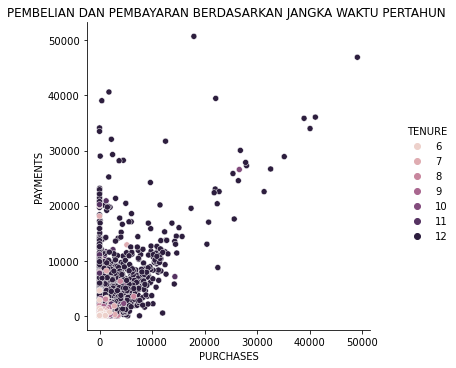

In [402]:
vs = df[['PAYMENTS', 'TENURE', 'PURCHASES']]


sns.relplot(data=vs, x='PURCHASES', y='PAYMENTS', hue='TENURE')
plt.title('PEMBELIAN DAN PEMBAYARAN BERDASARKAN JANGKA WAKTU PERTAHUN ')

**Analisis :**
berdasarkan plot di atas, pada jangka waktu / banyaknya  bulan 12  yang paling banyak melakukan pembelian dan pembayaran oleh pengguna


**Selanjutnya melihat korelasi antar atribut**

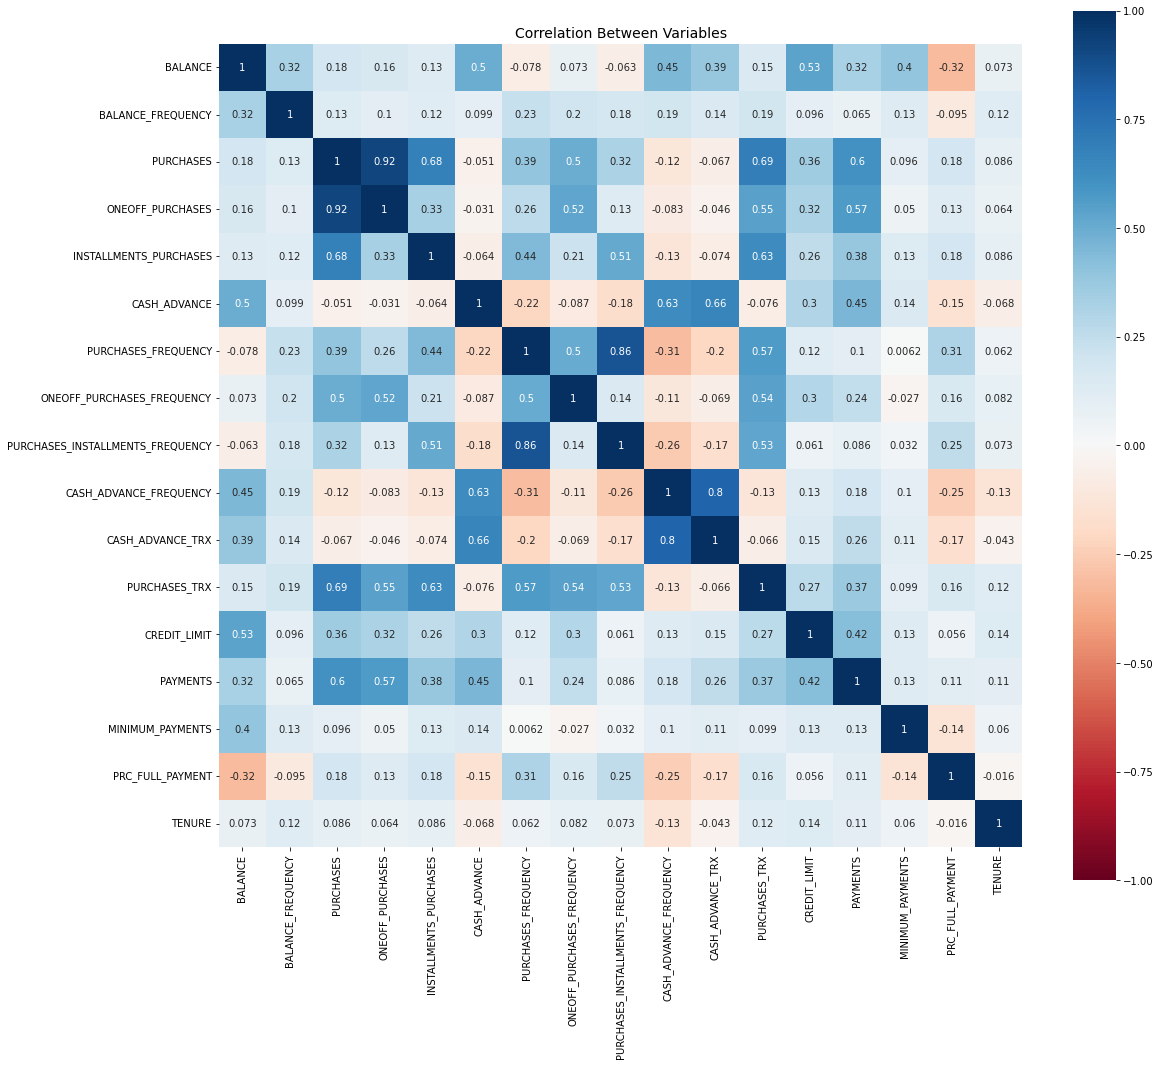

In [403]:
correlation_metrics=df.corr()
fig = plt.figure(figsize=(18,16))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.savefig('heatmap.png')
plt.show()


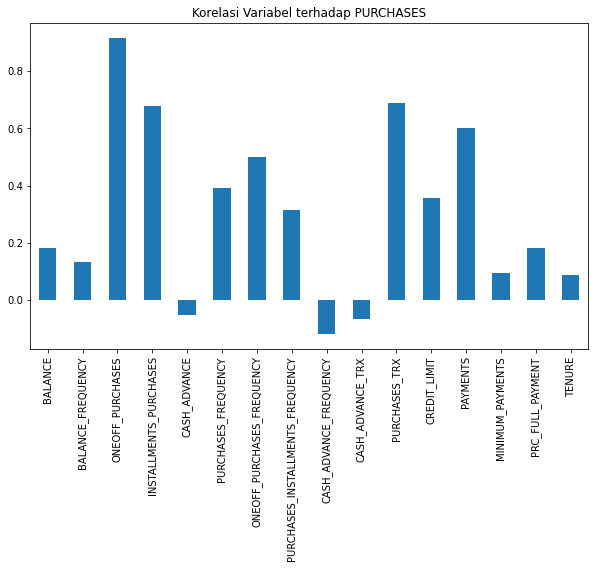

In [404]:
fig,ax = plt.subplots(figsize=(10,6))
korelasi = df.drop(columns=['PURCHASES'], inplace=False).corrwith(df.PURCHASES)
korelasi.plot.bar(title='Korelasi Variabel terhadap PURCHASES');

In [405]:
df.corr()['PURCHASES'].sort_values(ascending=False)

PURCHASES                           1.000000
ONEOFF_PURCHASES                    0.916845
PURCHASES_TRX                       0.689561
INSTALLMENTS_PURCHASES              0.679896
PAYMENTS                            0.603264
ONEOFF_PURCHASES_FREQUENCY          0.498430
PURCHASES_FREQUENCY                 0.393017
CREDIT_LIMIT                        0.356977
PURCHASES_INSTALLMENTS_FREQUENCY    0.315567
BALANCE                             0.181261
PRC_FULL_PAYMENT                    0.180379
BALANCE_FREQUENCY                   0.133674
MINIMUM_PAYMENTS                    0.095789
TENURE                              0.086288
CASH_ADVANCE                       -0.051474
CASH_ADVANCE_TRX                   -0.067175
CASH_ADVANCE_FREQUENCY             -0.120143
Name: PURCHASES, dtype: float64

**Analisis :**

Korelasi yang kuat :

- One off purchases dengan Purchases
- Purchases intallments frequency dengan Purchases frequency
- Cash in advance transactions dengan Cash in advance frequency
- Purchases dengan Purchases transactions

Korelasi sedang :

- Balance dengan Cash in advance
- Balance dengan Cash in advance frequency
- Balance dengan Credit limit


## 3. selanjutnya Menampilkan distribusi kemiringan dari kumpulan data

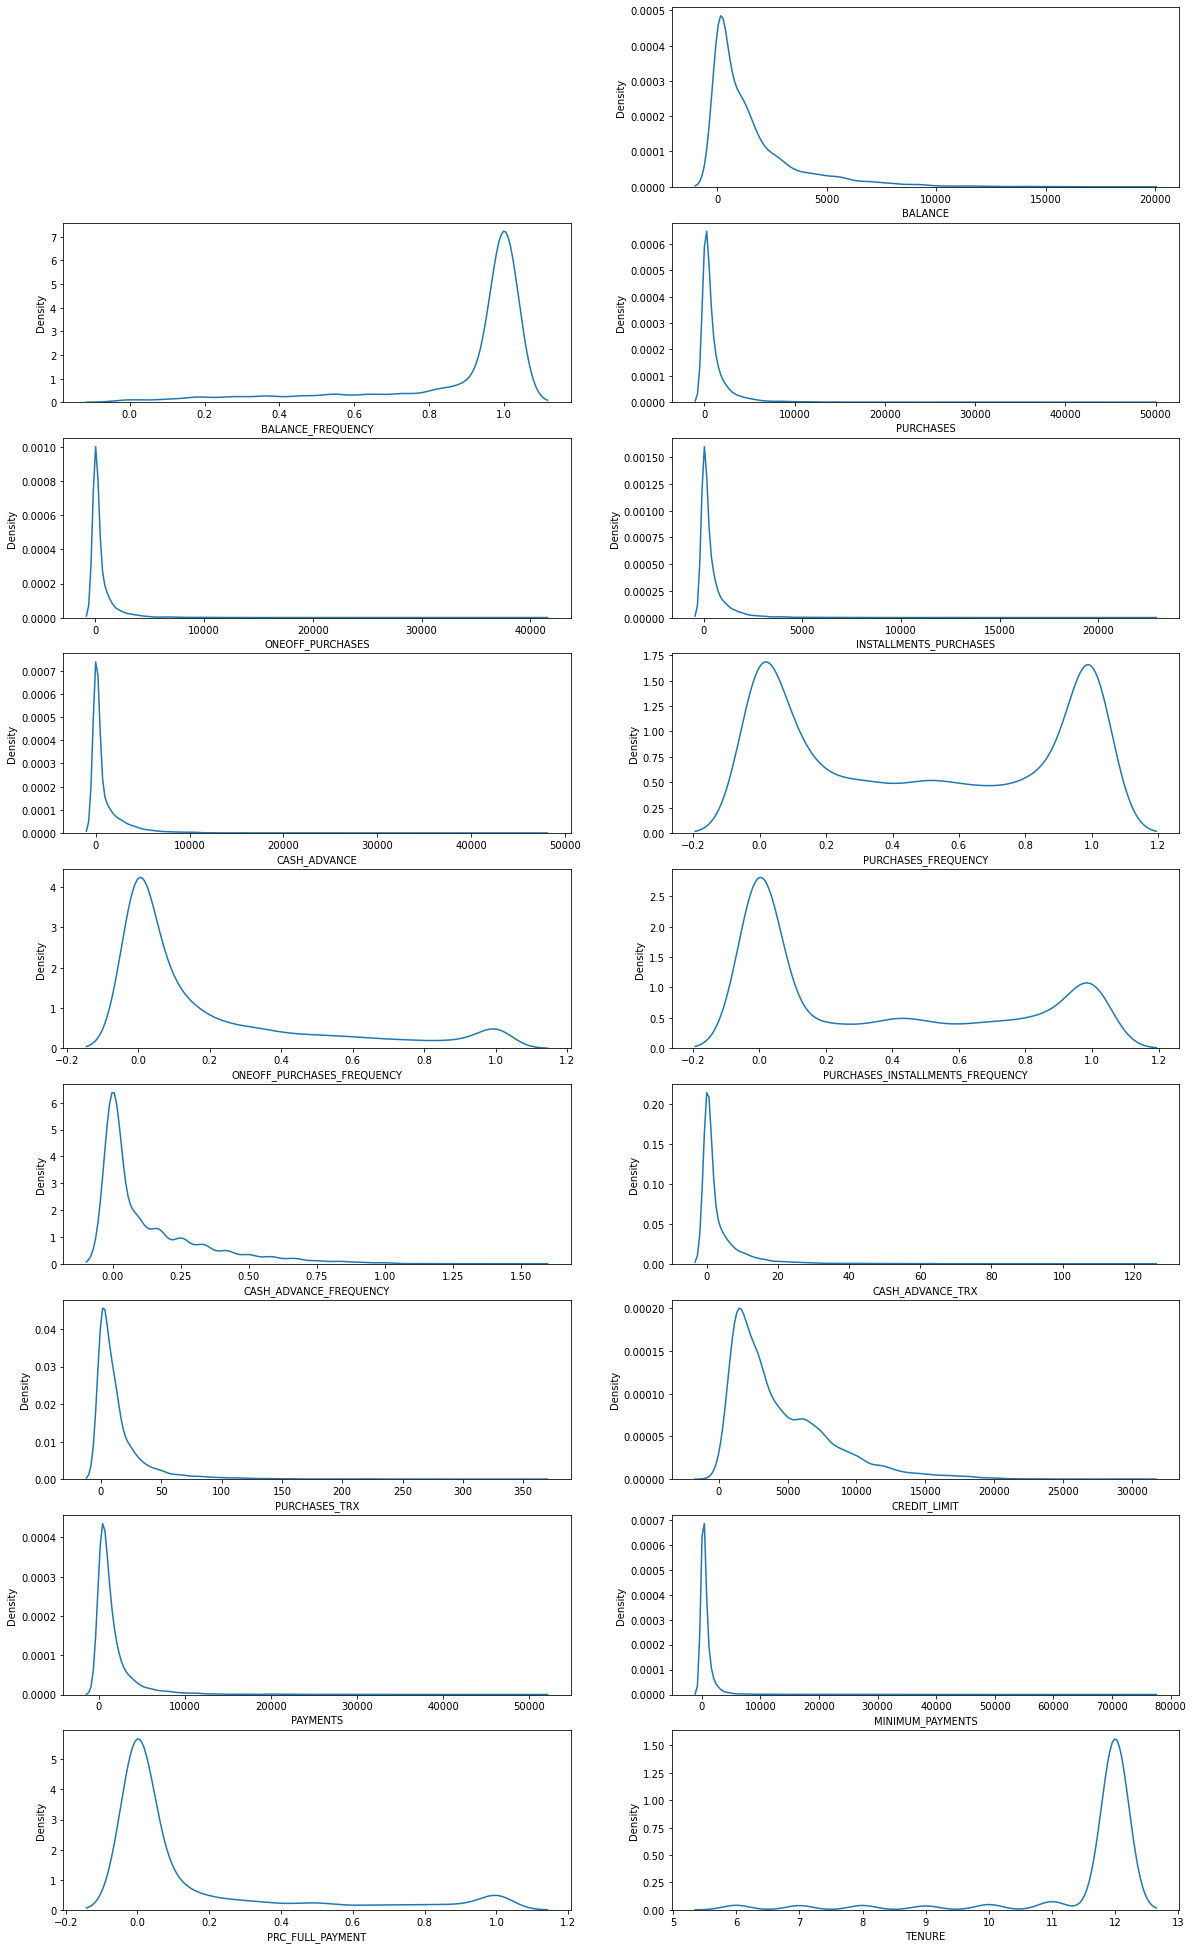

In [406]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()




C:\Users\Administrator\AppData\Local\Temp\ipykernel_5940\438521718.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_skew = df.skew()


<AxesSubplot:>

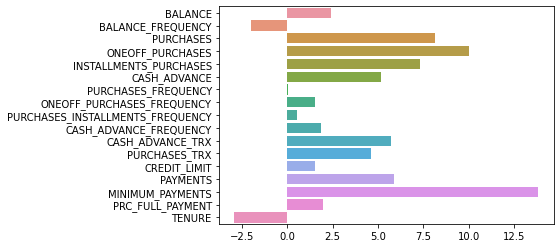

In [407]:
X_skew = df.skew()
sns.barplot(x=X_skew.values, y=X_skew.index)

Tampak pada gambar sebagian besar distribusi fitur miring ke kanan, jadi kami akan menerapkan transformasi log pada fitur untuk mengurangi kemiringan.

In [408]:
cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_TRX','TENURE','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','PURCHASES_INSTALLMENTS_FREQUENCY','CREDIT_LIMIT','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_TRX','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY','PRC_FULL_PAYMENT','TENURE']
for col in cols:
    df[col] = np.log(1 + df[col])

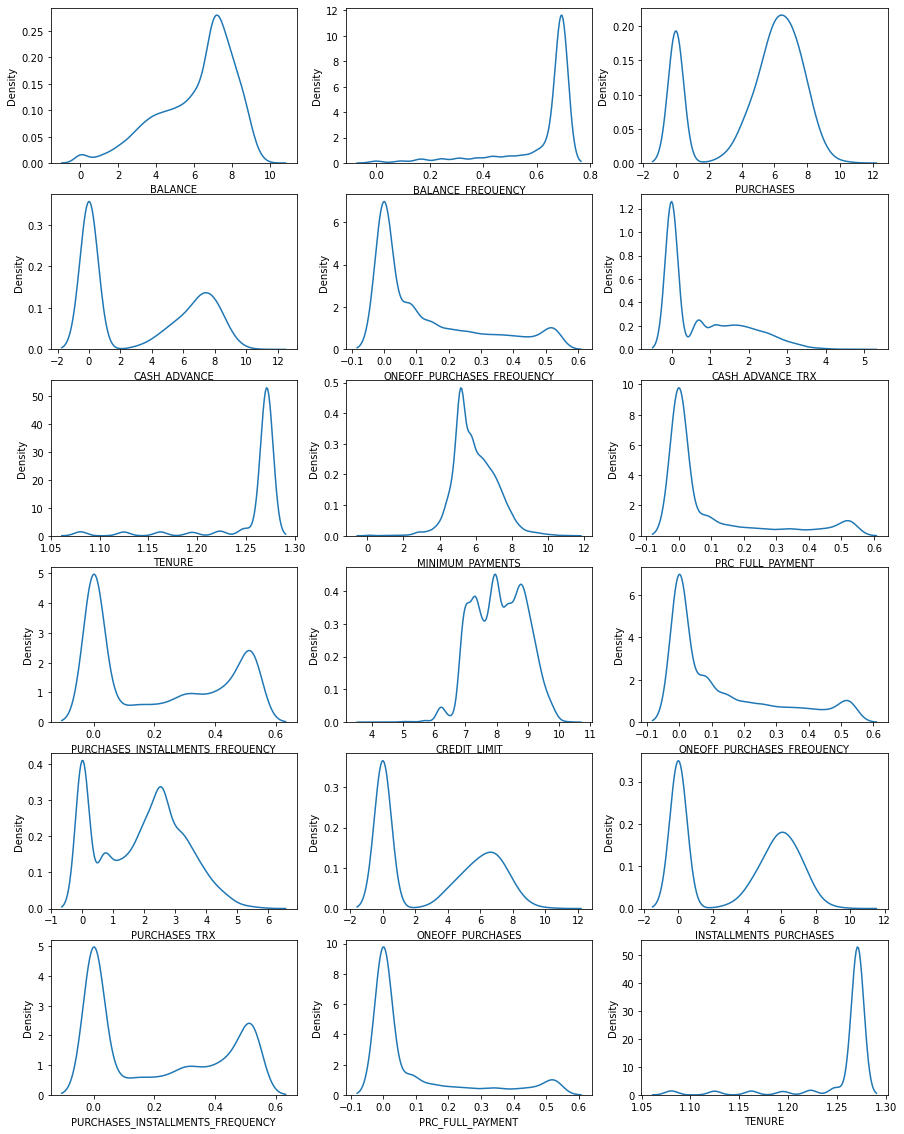

In [409]:
plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 3, i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5940\438521718.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_skew = df.skew()


<AxesSubplot:>

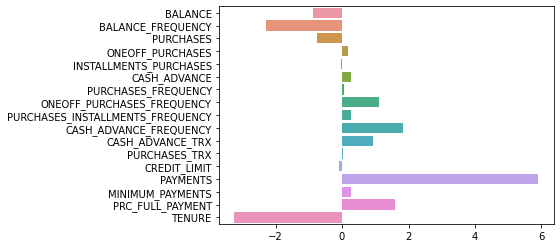

In [410]:
X_skew = df.skew()
sns.barplot(x=X_skew.values, y=X_skew.index)

Mungkin tidak terlihat seperti distribusi yang ideal tetapi ini lebih baik distribusi yang awal. 

# F. Preprocessing Data

## 1. pertama menghapus kolom CUST_ID , karena kolom CUST_ID merupakan identifier untuk tiap-tiap baris. Tidak ada informasi yang bisa didapatkan jika mengolah kolom ini karena tiap-tiap baris bernilai unik.

In [411]:
df = df.drop('CUST_ID', axis=1)

## 2. selanjutnya melakukan standardize & normalize Data, dikarnakan bahwa data memiliki range yang berbeda dan satuan yang berbeda, untuk itu perlu dilakukan standard scaler agar diperoleh kesamaan dalam satuan.

In [412]:

sc = StandardScaler()
df2=sc.fit_transform(df)

In [413]:
 normalised = normalize(df) 

In [414]:
normalised.shape

(8950, 17)

In [415]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.077,0.000000,0.000000,1.098612,6.908755,201.802084,4.945277,0.00000,1.27115
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000,0.250000,1.609438,0.000000,8.853808,4103.032597,6.978531,0.18288,1.27115
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,1.000000,0.526589,0.000,0.000000,0.000000,2.564949,8.922792,622.066742,6.442994,0.00000,1.27115
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.083333,0.077000,0.000,0.083333,0.693147,0.693147,8.922792,0.000000,5.747301,0.00000,1.27115
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.083333,0.077000,0.000,0.000000,0.000000,0.693147,7.090910,678.334763,5.504483,0.00000,1.27115


In [416]:
feat_cols = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE',
            'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX',
            'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
normalised = pd.DataFrame(normalised,columns=feat_cols)
normalised.tail()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,0.010387,0.002127,0.017424,0.000000,0.017424,0.000000,0.003069,0.000000,0.001454,0.000000,0.000000,0.005972,0.021204,0.999313,0.012000,0.001045,0.003316
8946,0.010881,0.002510,0.020666,0.000000,0.020666,0.000000,0.003621,0.000000,0.001716,0.000000,0.000000,0.007046,0.025018,0.998940,0.020812,0.000000,0.003912
8947,0.038918,0.007384,0.060664,0.000000,0.060664,0.000000,0.010152,0.000000,0.005027,0.000000,0.000000,0.021829,0.084167,0.990100,0.053895,0.002454,0.013162
8948,0.050128,0.011375,0.000000,0.000000,0.000000,0.068044,0.000000,0.000000,0.000000,0.003128,0.020617,0.000000,0.116662,0.986161,0.075792,0.003780,0.020275
8949,0.091073,0.007854,0.107591,0.107591,0.000000,0.074604,0.010250,0.006345,0.000000,0.005125,0.016891,0.048862,0.109022,0.971160,0.069062,0.000000,0.016611


### 3. Selanjutnya melakukan PCA


In [417]:
pca = PCA(n_components=0.95) 
X_red = pca.fit_transform(df)



dapat dilihat bahwa PCA pada n_components 0.95 di atas dapat  melakukan reduksi pada komponent yang berada di dalam data. kami memakai n_compenents 0.95 di karnakan hasilnya lebik baik dan dapat menentukan component secara otomatis sebanyak 95% data.

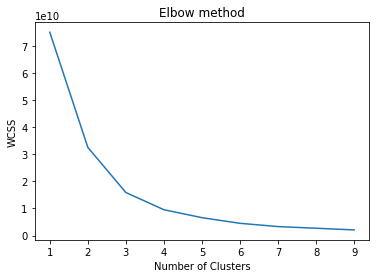

In [418]:
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


#### Analisis
Nilai inertia terhadap wcss menunjukkan bahwa k kluster yang dapat dipilih yakni 4-6 kluster. Dalam memilih banyaknya kluster harus mempertimbangkan computation cost, sehingga dipilih banyaknya k kluster yakni 4 kluster.

# G. Model Defining
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.

## 1. memasukan model yang ingin di pakai, yang nanti akan di lakukan training data

### K-Means
Metode klasterisasi pertama yang digunakan yakni K-Means.

In [419]:
kms = KMeans(n_clusters=4, random_state=42)

# H. Model Training & Prediction
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.


In [420]:
norm = normalised.iloc[:,0:14]

In [421]:
model_km = kms.fit(norm)

### Model prediction

In [422]:
normalised['Cluster KM'] = kms.fit_predict(normalised)

In [423]:
df['Cluster KM'] = kms.fit_predict(normalised)

## I. Evaluasi Model
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih.

In [424]:
normalised.iloc[:,0:14].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS
0,0.018480,0.002958,0.022602,0.000000,0.022602,0.000000,0.000825,0.000000,0.000381,0.000000,0.000000,0.005435,0.034180,0.998394
1,0.001967,0.000158,0.000000,0.000000,0.000000,0.002138,0.000000,0.000000,0.000000,0.000061,0.000392,0.000000,0.002158,0.999992
2,0.012570,0.001114,0.010689,0.010689,0.000000,0.000000,0.001607,0.000846,0.000000,0.000000,0.000000,0.004122,0.014339,0.999637
3,0.424179,0.028156,0.418121,0.418121,0.000000,0.304830,0.004764,0.004402,0.000000,0.004764,0.039629,0.039629,0.510145,0.000000
4,0.009887,0.001022,0.004176,0.004176,0.000000,0.000000,0.000123,0.000113,0.000000,0.000000,0.000000,0.001022,0.010452,0.999843


In [425]:
sil_km = silhouette_score(normalised.iloc[:,0:14], normalised['Cluster KM'])
ch_km = calinski_harabasz_score(normalised.iloc[:,0:14], normalised['Cluster KM'])
db_km = davies_bouldin_score(normalised.iloc[:,0:14], normalised['Cluster KM'])

In [426]:

model_selection = pd.DataFrame({'KMeans': [sil_km, ch_km, db_km]}, 
                               index = ['Silhouette Score', 'Calinski Harabasz score', 'Davies-Bouldin score'])
model_selection


,KMeans
Silhouette Score,0.959717
Calinski Harabasz score,35940.630691
Davies-Bouldin score,0.711040


di ketahui terdapat 3 score yang di tampilkan, dan definisinya sebagai berikut :

#### Silhoutte Score 
Silhouette Score digunakan untuk melihat kualitas dan kekuatan cluster, seberapa baik atau buruknya suatu obyek ditempatkan dalam suatu cluster. Metode ini merupakan gabungan dari metode separasi dan kohesi


#### Calinski Harabasz Score
Calinski Harabasz Score dapat digunakan untuk mengevaluasi model, di mana skor Calinski-Harabasz yang lebih tinggi berkaitan dengan model dengan kelompok yang terdefinisi lebih baik.


#### Davies - Bouldin score
adalah metrik untuk mengevaluasi algoritma pengelompokan. Ini adalah skema evaluasi internal, di mana validasi seberapa baik pengelompokan telah dilakukan menggunakan jumlah dan fitur yang melekat pada dataset.


dapat di analisiskan bahwa :
Calinski-Harabasz dapat memprediksi jumlah klaster optimal lebih baik dibandingkan
Melalui evaluasi model yang telah dilakukan, diperoleh 3 score yang hasilnya baik tidak adanya hasil yang sampai negatif dan evaluasi model ini menggunakan metode KMeans Clustering. 

### visualization by clustering model

Text(0.5, 1.0, 'BALANCE VS PURCHASES')

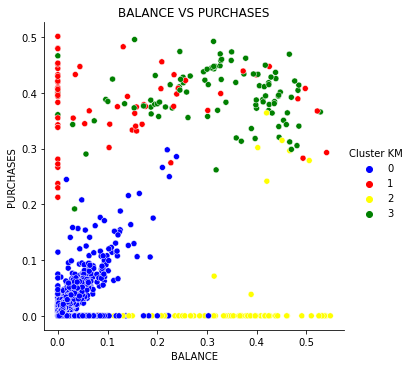

In [427]:
sns.relplot(x='BALANCE', y='PURCHASES', 
            data=normalised, hue='Cluster KM', palette=['blue','red','yellow','green'])

plt.title('BALANCE VS PURCHASES')

#### Analisis
Diperoleh bahwa klaster 0 merupakan customer yang banyak melakukan pembelian juga saldo tinggi, sedangkan klaster 1 merupakan customer yang memiliki saldo tinggi namun tidak banyak melakukan pembelian. Klaster 2 dan klaster 3 merupakan orang yang tidak banyak memiliki saldo dan tidak banyak melakukan pembelian juga.

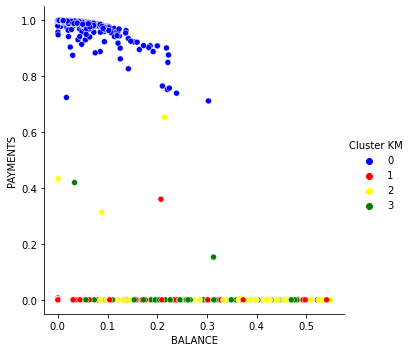

In [428]:
sns.relplot(x='BALANCE', y='PAYMENTS', 
            data=normalised, hue='Cluster KM', palette=['blue','red','yellow','green'])


#### Analisis
Diperoleh bahwa klaster 0  merupakan customer dengan saldo tinggi yang banyak melakukan pembayaran.  klaster 2 merupakan customer yang tidak memiliki banyak saldo namun melakukan pembayaran. Klaster 1 dan klaster 3 merupakan customer yang tidak banyak saldo dan tidak banyak melakukan pembayaran

## J. Model Inference
Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet.


In [429]:
X_new = {'BALANCE':[39,2500], 'BALANCE_FREQUENCY':[0.7,1], 'PURCHASES':[16,300],'INSTALLMENTS_PURCHASES':[0,0],
         'CASH_ADVANCE':[0,20], 'PURCHASES_FREQUENCY':[0.2,0.5], 'ONEOFF_PURCHASES_FREQUENCY':[0,0.5],
         'CASH_ADVANCE_FREQUENCY':[0.2,0.6],'PURCHASES_TRX':[2,15],'CREDIT_LIMIT':[2000,50000],'PAYMENTS':[20,2000],
         'MINIMUM_PAYMENTS':[15,1500],'PRC_FULL_PAYMENT':[0,0],'TENURE':[12,12]
}
X_new = pd.DataFrame(X_new)
X_new.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,39,0.7,16,0,0,0.2,0.0,0.2,2,2000,20,15,0,12
1,2500,1.0,300,0,20,0.5,0.5,0.6,15,50000,2000,1500,0,12


In [430]:
sc = StandardScaler()
Xnew=sc.fit_transform(X_new)
Xnew = normalize(Xnew) 

In [431]:
feat_cols = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE',
            'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','PURCHASES_TRX',
            'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
Xnew = pd.DataFrame(Xnew,columns=feat_cols)
Xnew.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.301511,-0.301511,-0.301511,0.0,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,-0.301511,0.0,0.0
1,0.301511,0.301511,0.301511,0.0,0.301511,0.301511,0.301511,0.301511,0.301511,0.301511,0.301511,0.301511,0.0,0.0


In [432]:
model1 = kms.fit(norm)

In [433]:
model1.predict(Xnew)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MINIMUM_PAYMENTS
- PRC_FULL_PAYMENT
- TENURE
Feature names seen at fit time, yet now missing:
- CASH_ADVANCE_TRX
- ONEOFF_PURCHASES
- PURCHASES_INSTALLMENTS_FREQUENCY

  warnings.warn(message, FutureWarning)


array([0, 2])

# K. Conclusions

Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:

- Terdapat 18 atribut yang menjadi kriteria masing-masing customer yang kemudian dipilih 14 atribut yang saling independen (dilihat dari korelasi) untuk pembentukan klaster.

- metode KMeans  Clustering menunjukkan kebaikan model yang relatif baik.

- Terdapat 4 klaster optimal dengan ciri-ciri yakni klaster 0 merupakan customer dengan saldo dan pengeluaran yang banyak, klaster 1 merupakan customer dengan saldo banyak namun pengeluarannya lebih sedikit dari klaster 0, klaster 2 memiliki saldo yang lebih sedikit dari klaster 0 dan 1 dan memiliki pengeluaran yang tidak banyak juga. Klaster 3 merupakan customer dengan saldo dan pengeluaran paling sedikit diantara ketiga klaster lainnya.